    Transactions analysis:
        Q1 - Which are the TOP 100 sold items?
        Q2 - Which are the products that sold only once ?
        Q3 - Which are the most products that generate most earnings?
        Q4 - Which are worst 100 profitable products?

    Customer Analysis:
        Q5 - Which age group purchase more products?
        Q6 - Which Age Group generate more earnings for the company?
        Q7 - Do active customers on the fashion news purchase more products?
        Q8 - Does the club member status influence the purchased quantity?


In [35]:
import numpy as np 
import pandas as pd
from pandasql import sqldf

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
sns.set_style("whitegrid")
sns.despine()
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

<Figure size 432x288 with 0 Axes>

In [36]:
df_a = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
df_t = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")
df_c = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")

In [37]:
df_a.head(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [38]:
df_a.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [39]:
df_a = sqldf("""SELECT article_id, prod_name, product_type_name, product_group_name, colour_group_name, index_name
            FROM df_a
            """)

In [40]:
df_a.head()

,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Black,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,White,Ladieswear
2,108775051,Strap top (1),Vest top,Garment Upper body,Off White,Ladieswear
3,110065001,OP T-shirt (Idro),Bra,Underwear,Black,Lingeries/Tights
4,110065002,OP T-shirt (Idro),Bra,Underwear,White,Lingeries/Tights


In [41]:
df_t.head(1)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2


In [42]:
df_t.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [43]:
print(f"The dataframe Transactions has {len(df_t)} rows")

The dataframe Transactions has 31788324 rows


In [44]:
df_t = df_t[["customer_id", "article_id", "price"]]

In [45]:
df_sold_qty = df_t["article_id"].value_counts()
df_sold_qty

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64

In [46]:
df_sold_qty=df_sold_qty.reset_index()
df_sold_qty.rename(columns = {"article_id":"sold_qty","index":"article_id"}, inplace=True)
df_sold_qty.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [47]:
df_sold_qty["sold_qty"].describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
Name: sold_qty, dtype: float64

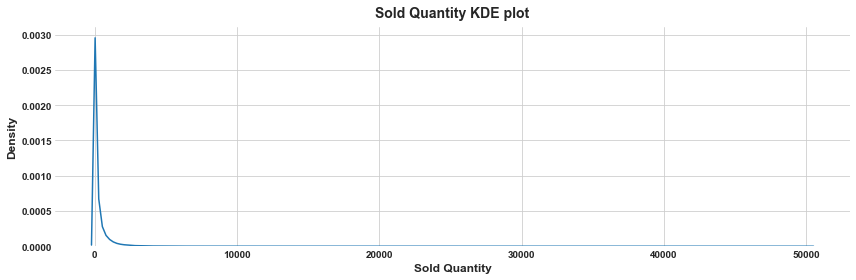

In [48]:
plt.figure(figsize=(12,4))
plt.title("Sold Quantity KDE plot")
sns.kdeplot(df_sold_qty["sold_qty"])
plt.xlabel("Sold Quantity")
plt.show()

In [49]:
df_sold_qty["sold_qty"].quantile([0.90,0.95,0.99,0.999])

0.900     793.000
0.950    1318.000
0.990    3185.080
0.999    9282.534
Name: sold_qty, dtype: float64

In [50]:
top_100_sold = df_sold_qty.iloc[:100]
top_100_sold.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [51]:
top_100_details = sqldf("""SELECT *
        FROM top_100_sold t
        INNER JOIN df_a a
        on t.article_id = a.article_id
    """)

In [52]:
top_100_details.head()

,article_id,sold_qty,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,50287,706016001,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided
1,706016002,35043,706016002,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Divided
2,372860001,31718,372860001,7p Basic Shaftless,Socks,Socks & Tights,Black,Lingeries/Tights
3,610776002,30199,610776002,Tilly (1),T-shirt,Garment Upper body,Black,Ladieswear
4,759871002,26329,759871002,Tilda tank,Vest top,Garment Upper body,Black,Divided


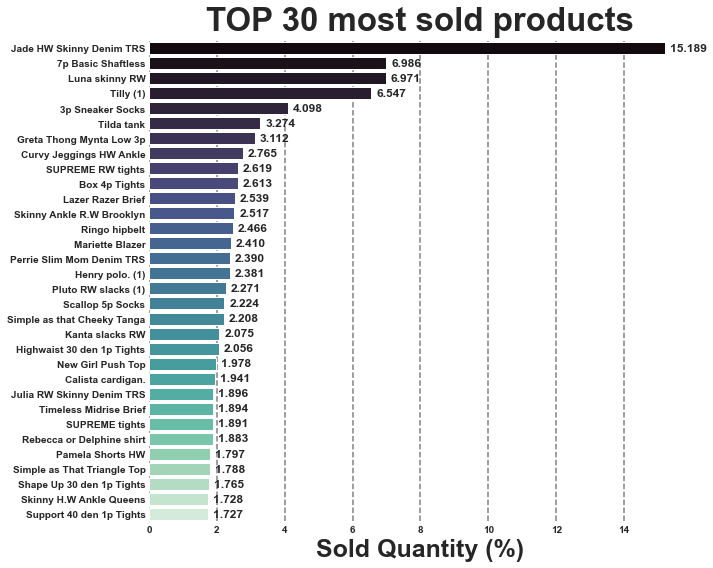

In [53]:
plt.figure(figsize=(10,8))
plt.title("TOP 30 most sold products", fontsize=33, fontweight="bold")
no=40
g = sns.barplot(y="prod_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("prod_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.3f', fontsize=12)
plt.xlabel("Sold Quantity (%)", size=25, fontweight="bold")
plt.ylabel("")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

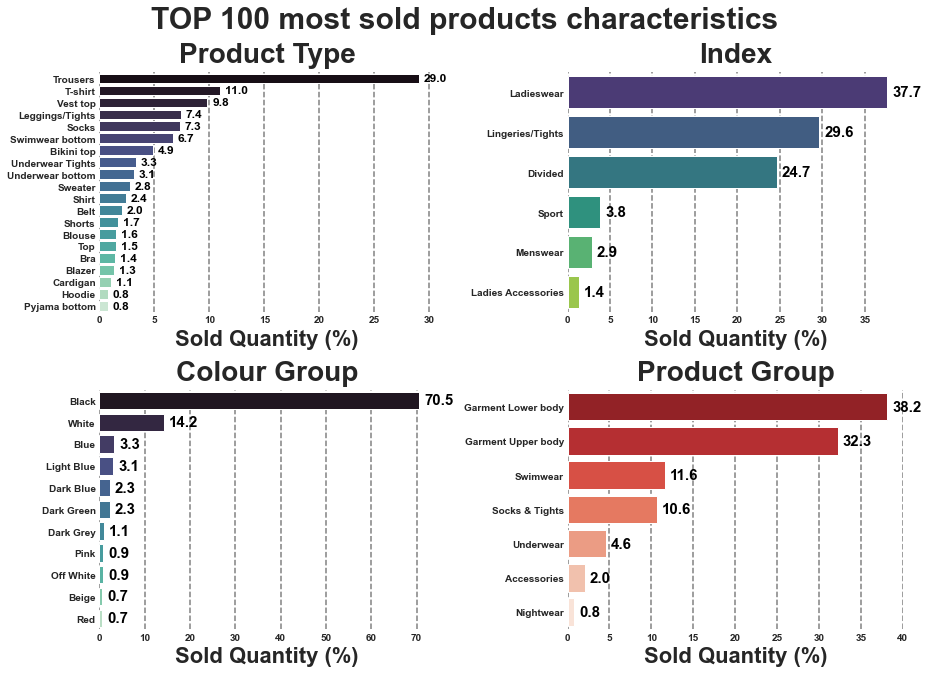

In [54]:
fig, ax = plt.subplots(2,2, figsize=(13,9.5))
plt.suptitle("TOP 100 most sold products characteristics", fontweight="bold",fontsize=30)

no=100

g = sns.barplot(y="product_type_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("product_type_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12, color="black")
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[0,0].set_title("Product Type",fontweight="bold",fontsize=28)
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="index_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("index_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[0,1].set_title("Index",fontweight="bold",fontsize=28)
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="colour_group_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("colour_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[1,0].set_title("Colour Group",fontweight="bold",fontsize=28)
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("product_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[1,1].set_title("Product Group",fontweight="bold",fontsize=28)
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 

In [55]:
df_sold_qty["sold_qty"].where(lambda x: x==1).dropna() #top 15% products

100056    1.0
100057    1.0
100058    1.0
100059    1.0
100060    1.0
         ... 
104542    1.0
104543    1.0
104544    1.0
104545    1.0
104546    1.0
Name: sold_qty, Length: 4491, dtype: float64

In [56]:
worst_sold = df_sold_qty.tail(4491)

In [57]:
worst_details = sqldf("""SELECT *
        FROM worst_sold t
        INNER JOIN df_a a
        on t.article_id = a.article_id
    """)

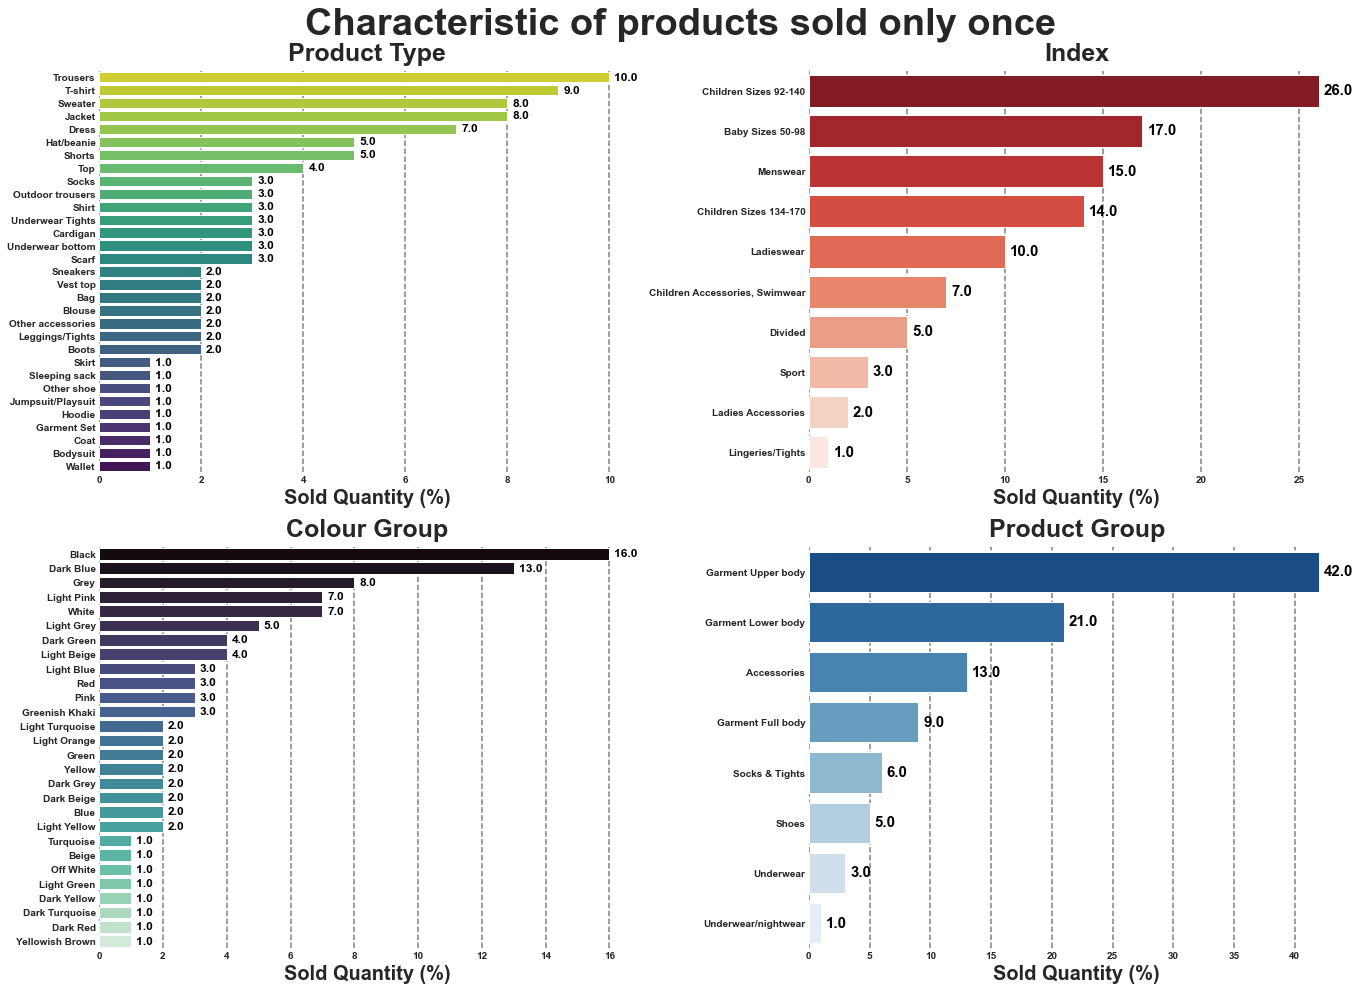

In [58]:
fig, ax = plt.subplots(2,2, figsize=(19,14))
plt.suptitle("Characteristic of products sold only once", size=38, fontweight="bold")

no=100

g = sns.barplot(y="product_type_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("product_type_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,0],palette="viridis_r", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12, color="black")
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[0,0].set_title("Product Type", size=25, fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="index_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("index_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,1],palette="Reds_r", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[0,1].set_title("Index", size=25, fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="colour_group_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("colour_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12, color="black")
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[1,0].set_title("Colour Group", size=25, fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("product_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,1],palette="Blues_r", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[1,1].set_title("Product Group", size=25, fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

fig.tight_layout()

plt.show()

In [59]:
df_prices = df_t[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False)

In [60]:
df_prices.rename(columns={"price":"earning"}, inplace=True)
df_prices = df_prices.reset_index()

In [61]:
df_prices.head()

,article_id,earning
0,706016001,1631.732102
1,706016002,1136.321085
2,568601006,939.268593
3,448509014,781.478390
4,706016003,692.195915


In [62]:
print("Number of different sold articles:",len(df_prices["earning"]))
print("Total Earnings:",df_prices["earning"].sum())

Number of different sold articles: 104547
Total Earnings: 884645.974050846


In [63]:
for i in [10,50,100,200,300,400,1000]:
    print("The TOP {} of products that generate most earnings, account for the {:.2f} % of total earnings".format(i, df_prices["earning"].iloc[:i].sum() / df_prices["earning"].iloc[:].sum() * 100) ) 

The TOP 10 of products that generate most earnings, account for the 0.94 % of total earnings
The TOP 50 of products that generate most earnings, account for the 2.74 % of total earnings
The TOP 100 of products that generate most earnings, account for the 4.36 % of total earnings
The TOP 200 of products that generate most earnings, account for the 6.75 % of total earnings
The TOP 300 of products that generate most earnings, account for the 8.60 % of total earnings
The TOP 400 of products that generate most earnings, account for the 10.20 % of total earnings
The TOP 1000 of products that generate most earnings, account for the 17.50 % of total earnings


In [64]:
top_100_prices=df_prices.iloc[:100]

In [65]:
top_100_price_details = sqldf("""SELECT *
        FROM top_100_prices t
        INNER JOIN df_a a
        on t.article_id = a.article_id""")
top_100_price_details.head()

,article_id,earning,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,1631.732102,706016001,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided
1,706016002,1136.321085,706016002,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Divided
2,568601006,939.268593,568601006,Mariette Blazer,Blazer,Garment Upper body,Black,Ladieswear
3,448509014,781.478390,448509014,Perrie Slim Mom Denim TRS,Trousers,Garment Lower body,Blue,Divided
4,706016003,692.195915,706016003,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Dark Blue,Divided


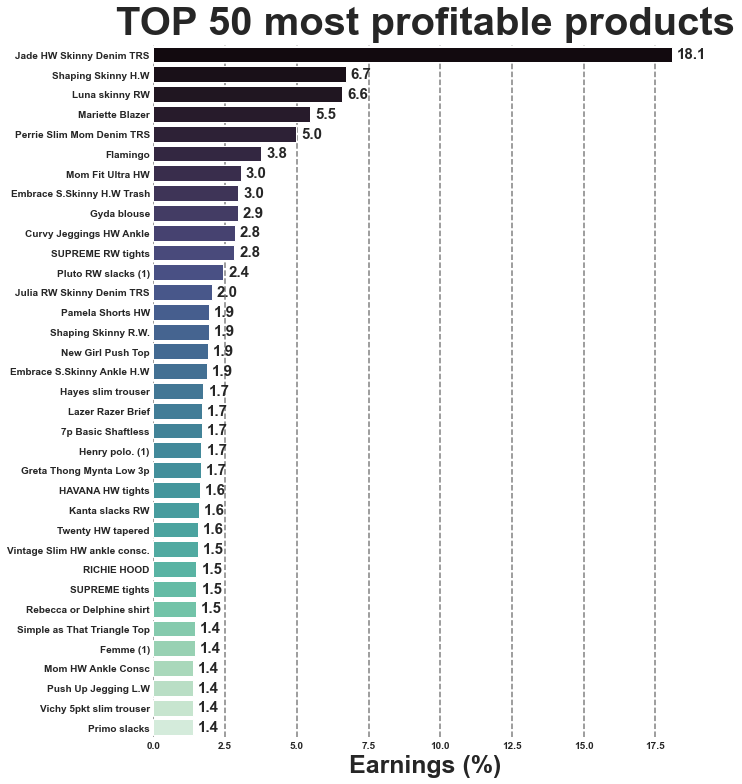

In [66]:
plt.figure(figsize=(10,11))
plt.title("TOP 50 most profitable products", size=40, fontweight="bold")
no=50
g = sns.barplot(y="prod_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("prod_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15)
plt.xlabel("Earnings (%)", size=25, fontweight="bold")
plt.ylabel("")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

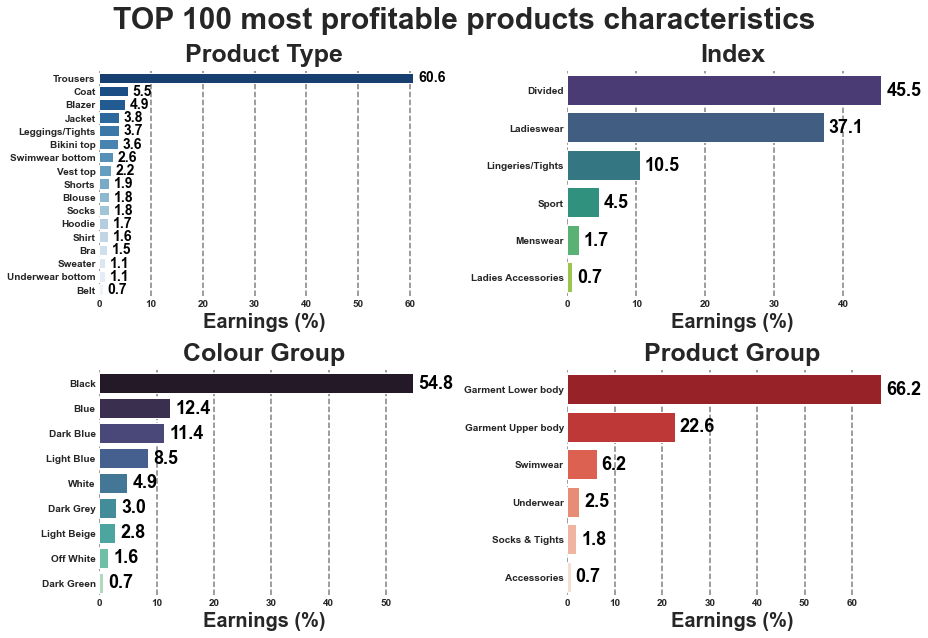

In [67]:
fig, ax = plt.subplots(2,2, figsize=(13,9))
plt.suptitle("TOP 100 most profitable products characteristics", fontweight="bold", fontsize=30)

no=100

g = sns.barplot(y="product_type_name", x="earning(%)", 
                data=top_100_price_details.iloc[:no].groupby("product_type_name"
                                                                )["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index(
                ).sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,0],palette="Blues_r", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=14, color="black")
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,0].set_title("Product Type", size=25,fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="index_name", x="earning(%)", 
                data=top_100_price_details.iloc[:no].groupby("index_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index(
                ).sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', padding = 5, fontsize=18, color="black")
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,1].set_title("Index", size=25,fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="colour_group_name", x="earning(%)", data=
                top_100_price_details.iloc[:no].groupby("colour_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index(
                ).sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,0].set_title("Colour Group", size=25,fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="earning(%)", 
                data=top_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index(
                ).sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', padding=5, fontsize=18, color="black")
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,1].set_title("Product Group", size=25,fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 

In [68]:
worst_100_prices=df_prices.iloc[-100:]

In [70]:
worst_100_price_details = sqldf("""SELECT *
        FROM worst_100_prices t
        INNER JOIN df_a a
        on t.article_id = a.article_id""")

In [71]:
worst_100_price_details.head()

,article_id,earning,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,555293002,0.002136,555293002,Elin thin hair elastic,Hair string,Accessories,Light Pink,Divided
1,502262002,0.002119,502262002,Kelly mittens,Gloves,Accessories,Light Grey,Baby Sizes 50-98
2,585716001,0.002034,585716001,Festival dress,Dress,Garment Full body,Light Orange,Children Sizes 134-170
3,807241091,0.001864,807241091,1p Fun Socks,Socks,Socks & Tights,Light Grey,Lingeries/Tights
4,551413003,0.001695,551413003,DANTE set,Garment Set,Garment Full body,Light Blue,Baby Sizes 50-98


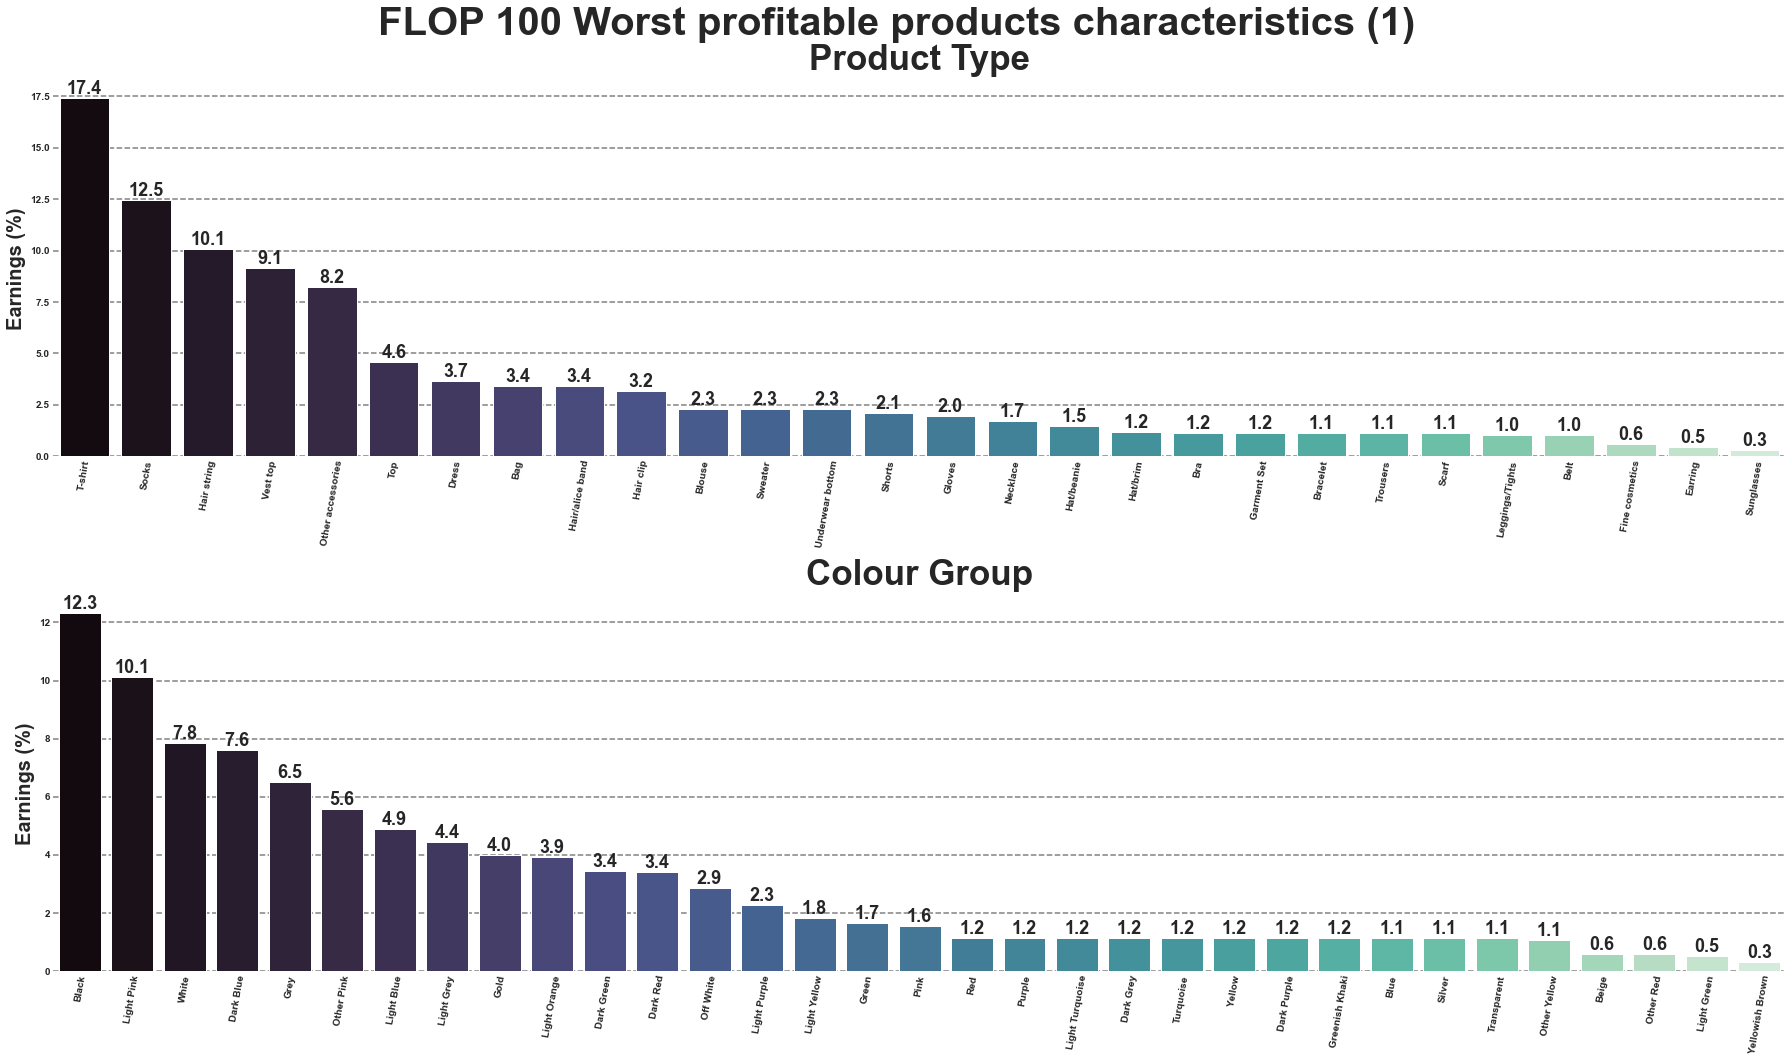

In [72]:
fig, ax = plt.subplots(2,1, figsize=(25,15))
plt.suptitle("FLOP 100 Worst profitable products characteristics (1)", fontsize=40 ,fontweight="bold")

no=100

g = sns.barplot(x="product_type_name", y="earning(%)", 
                data=worst_100_price_details.iloc[:no].groupby("product_type_name"
                                                                )["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index(
                ).sort_values(by="earning(%)", ascending=False), \
            ax=ax[0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)
ax[0].grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
ax[0].set_xlabel("")
ax[0].set_ylabel("Earnings (%)", size=20,fontweight="bold")
ax[0].set_xticklabels(g.get_xticklabels(), rotation=80)
ax[0].set_title("Product Type", size=35,fontweight="bold")

g = sns.barplot(x="colour_group_name", y="earning(%)", 
                data=worst_100_price_details.iloc[:no].groupby("colour_group_name"
                                                                )["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index(
                ).sort_values(by="earning(%)", ascending=False), \
            ax=ax[1],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)
ax[1].set_ylabel("Earnings (%)", size=20,fontweight="bold")
ax[1].set_xlabel("")
ax[1].set_xticklabels(g.get_xticklabels(), rotation=80)
ax[1].set_title("Colour Group", size=35,fontweight="bold")
ax[1].grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)


fig.tight_layout()

plt.show() 

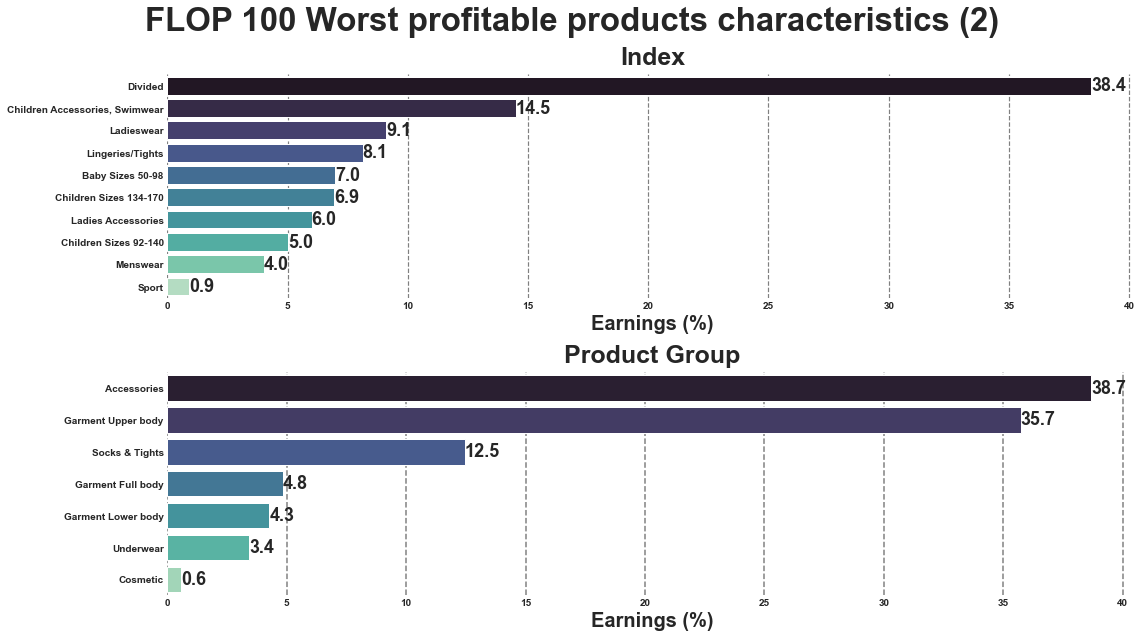

In [73]:
fig, ax = plt.subplots(2,1, figsize=(16,9))
plt.suptitle("FLOP 100 Worst profitable products characteristics (2)", fontsize=33 ,fontweight="bold")

no=100

g = sns.barplot(y="index_name", x="earning(%)", data=worst_100_price_details.iloc[:no].groupby("index_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)
ax[0].set_ylabel("")
ax[0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0].set_title("Index",size=25,fontweight="bold")
ax[0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.2)

g = sns.barplot(y="product_group_name", x="earning(%)", data=worst_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)
ax[1].set_ylabel("")
ax[1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1].set_title("Product Group", size=25,fontweight="bold")
ax[1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

plt.tight_layout()

plt.show()

In [74]:
df_t.head()

,customer_id,article_id,price
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932


In [75]:
df_cust_prices = df_t[["customer_id", "price"]].groupby("customer_id").sum()

In [76]:
df_cust_prices.head()

,price
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.648983
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2.601932
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.704780
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.060983
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.469695


In [77]:
df_cust_qty = df_t[["customer_id", "article_id"]].groupby("customer_id").count()

In [78]:
df_cust_qty.head()

,article_id
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13


In [79]:
cust_qty_price = pd.merge(df_cust_prices, df_cust_qty, on='customer_id', how='inner')

In [80]:
cust_qty_price.head()

,price,article_id
customer_id,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.648983,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2.601932,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.704780,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.060983,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.469695,13


In [81]:
df_c.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [83]:
cust_details = pd.merge(cust_qty_price, df_c.drop("postal_code", axis=1), on='customer_id', how='inner')

In [84]:
cust_details.head()

,customer_id,price,article_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983,21,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932,86,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,18,NaN,NaN,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983,2,NaN,NaN,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,13,1.0,1.0,ACTIVE,Regularly,52.0


In [85]:
print(f"In total there are {len(cust_details)} different customers")

In total there are 1362281 different customers


In [86]:
cust_details.article_id.describe()

count    1.362281e+06
mean     2.333463e+01
std      3.924225e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.700000e+01
max      1.895000e+03
Name: article_id, dtype: float64

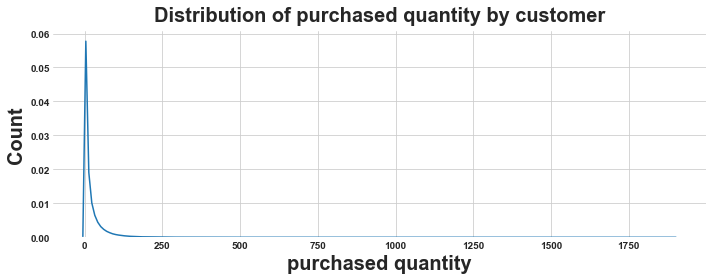

In [87]:
plt.figure(figsize=(10,4))
plt.title("Distribution of purchased quantity by customer", fontweight="bold", size=20)
sns.kdeplot(cust_details["article_id"])
plt.xlabel("purchased quantity",fontweight="bold", size=20)
plt.ylabel("Count",fontweight="bold", size=20)
plt.show()

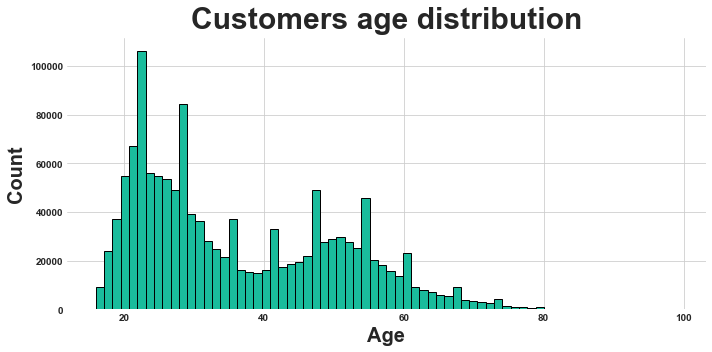

In [88]:
plt.figure(figsize=(10,5))
plt.title("Customers age distribution", fontweight="bold", size=30)
plt.hist(cust_details["age"], bins=70, edgecolor="black", color="#1ABC9C")
plt.xlabel("Age",fontweight="bold", size=20)
plt.ylabel("Count",fontweight="bold", size=20)
plt.show()

In [89]:
cust_details['age_groups'] = pd.cut(cust_details['age'], bins=[16, 20, 30, 40,50, 60, 70, float('Inf')], labels=['16-20', '20-30','30-40','40-50','50-60','60-70' , '70+'])

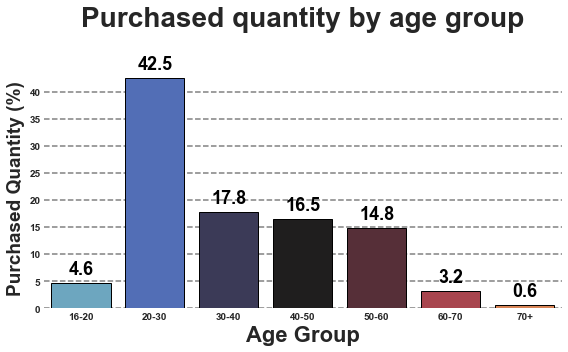

In [90]:
plt.figure(figsize=(8,5))
plt.title("Purchased quantity by age group\n", fontweight="bold", size=28)
g = sns.barplot(x="age_groups", y="Purchased Quantity(%)", data=cust_details.groupby("age_groups")["article_id"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('Purchased Quantity(%)').reset_index(), palette="icefire", edgecolor="black")
plt.xlabel("Age Group",fontweight="bold", size=22)
plt.ylabel("Purchased Quantity (%)",fontweight="bold", size=19)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

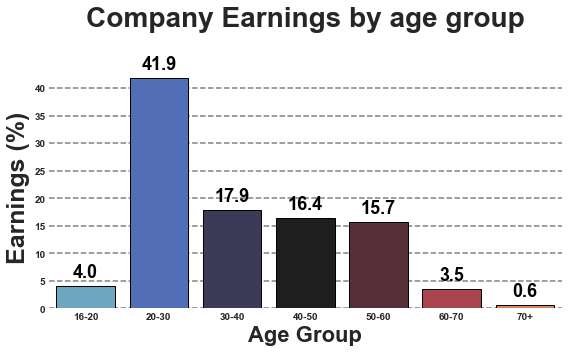

In [91]:
plt.figure(figsize=(8,5))
plt.title("Company Earnings by age group\n", fontweight="bold", size=28)
g = sns.barplot(x="age_groups", y="earning(%)", data=cust_details.groupby("age_groups")["price"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index(), palette="icefire",edgecolor="black")
plt.xlabel("Age Group",fontweight="bold", size=22)
plt.ylabel("Earnings (%)",fontweight="bold", size=25)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

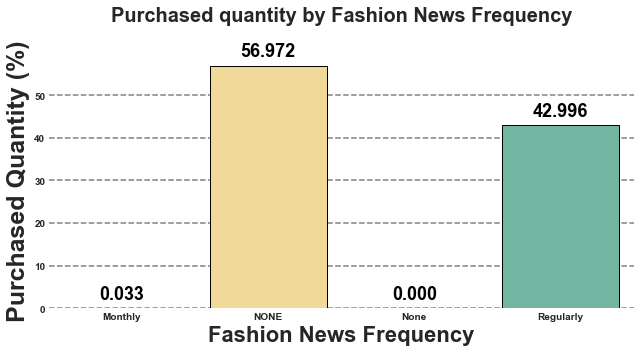

In [92]:
plt.figure(figsize=(9,5))
plt.title("Purchased quantity by Fashion News Frequency\n", fontweight="bold", size=20)
g = sns.barplot(x="fashion_news_frequency", y="Purchased Quantity(%)", data=cust_details.groupby("fashion_news_frequency")["article_id"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('Purchased Quantity(%)').reset_index(), palette="Spectral", edgecolor="black")
plt.xlabel("Fashion News Frequency",fontweight="bold", size=22)
plt.ylabel("Purchased Quantity (%)",fontweight="bold", size=25)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.3f', fontsize=18, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

In [93]:
x, y = 'age_groups', 'fashion_news_frequency'
df_age_news = cust_details.groupby(x)[y].value_counts(normalize=True)
df_age_news = df_age_news.mul(100)
df_age_news = df_age_news.rename('percent(%)').reset_index()
df_age_news = df_age_news[df_age_news["fashion_news_frequency"].isin(["Regularly","NONE"])]

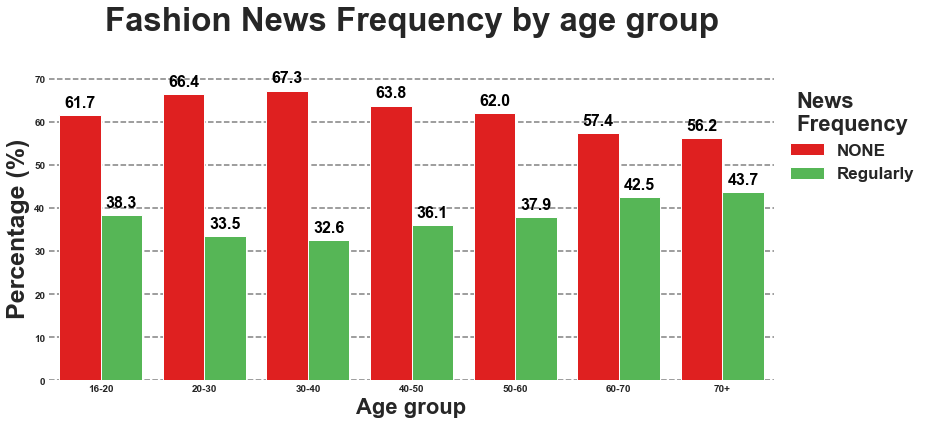

In [94]:
palette1 = {"Regularly":'#46C646', "NONE":'#FF0000'}

plt.figure(figsize=(13,6))
plt.title("Fashion News Frequency by age group\n",fontweight="bold", size=33)
g=sns.barplot(x="age_groups", y="percent(%)",data=df_age_news, hue="fashion_news_frequency", palette=palette1)
plt.xlabel("Age group",fontweight="bold", size=22)
plt.ylabel("Percentage (%)",fontweight="bold", size=25)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=16, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.legend(title='News\nFrequency',bbox_to_anchor=(1.0, 1.0), ncol=1, fancybox=True, shadow=True, fontsize=17,title_fontsize=22)
plt.show()

In [95]:
cust_details["club_member_status"].value_counts(normalize=True)

ACTIVE        0.931395
PRE-CREATE    0.068261
LEFT CLUB     0.000344
Name: club_member_status, dtype: float64

In [97]:
cust_details.groupby("club_member_status")["article_id"].sum()

club_member_status
ACTIVE        31057401
LEFT CLUB         8539
PRE-CREATE      660219
Name: article_id, dtype: int64

In [98]:
print("The average quantity of purchased products by the customers is {:.0f} products ".format(cust_details["article_id"].mean()))

The average quantity of purchased products by the customers is 23 products 


In [99]:
print("The average quantity of purchased products by the ACTIVE customers is {:.0f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["ACTIVE"]))
print("The average quantity of purchased products by the LEFT-CLUB customers is {:.0f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["LEFT CLUB"]))
print("The average quantity of purchased products by the PRE-CREATE customers is {:.0f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["PRE-CREATE"]))

The average quantity of purchased products by the ACTIVE customers is 25 products 
The average quantity of purchased products by the LEFT-CLUB customers is 18 products 
The average quantity of purchased products by the PRE-CREATE customers is 7 products 


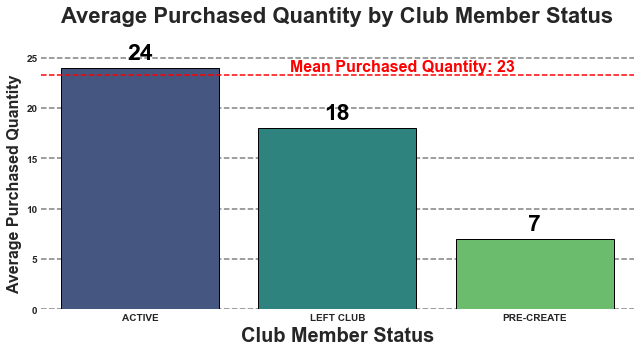

In [100]:
plt.figure(figsize=(9,5))
plt.title("Average Purchased Quantity by Club Member Status\n", fontweight="bold", size=22)
g = sns.barplot(x="club_member_status", y="article_id", data=cust_details.groupby("club_member_status")["article_id"].mean().astype(int).reset_index(), palette="viridis", edgecolor="black")
plt.axhline(y = cust_details["article_id"].mean(), color = 'r', linestyle = '--')
plt.text(0.76, 23.7, 'Mean Purchased Quantity: {:.0f}'.format(cust_details["article_id"].mean()), size=16, color="red",fontweight="bold")
plt.xlabel("Club Member Status",fontweight="bold", size=20)
plt.ylabel("Average Purchased Quantity",fontweight="bold", size=16)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.0f', fontsize=23, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

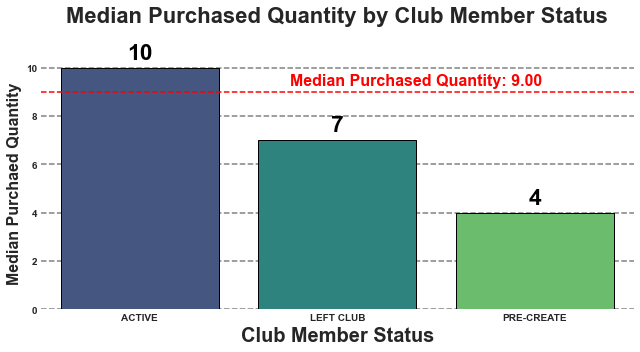

In [101]:
plt.figure(figsize=(9,5))
plt.title("Median Purchased Quantity by Club Member Status\n", fontweight="bold", size=22)
g = sns.barplot(x="club_member_status", y="article_id", data=cust_details.groupby("club_member_status")["article_id"].median().reset_index(), palette="viridis", edgecolor="black")
plt.axhline(y = cust_details["article_id"].median(), color = 'r', linestyle = '--')
plt.text(0.76, 9.3, 'Median Purchased Quantity: {:.2f}'.format(cust_details["article_id"].median()), size=16, color="red",fontweight="bold")
plt.xlabel("Club Member Status",fontweight="bold", size=20)
plt.ylabel("Median Purchaed Quantity",fontweight="bold", size=16)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.0f', fontsize=23, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()